In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

### Criar dataframe

In [2]:
df = pd.read_csv('household_power_consumption.txt', sep=";", low_memory=False)

### Visualização (10 primeiras linhas)

In [3]:
df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


#### Diferença entre Global_active_power e Global_reactive_power

- Global_active_power (kW): é a potência ativa/real — a parte que vira trabalho útil (calor, luz, rotação…). É o que, integrado no tempo, vira kWh na conta de luz.

- Global_reactive_power (kVAr): é a potência reativa — energia que “vai e volta” entre a rede e cargas indutivas/capacitivas (motores, transformadores, fontes). Não faz trabalho útil, mas aumenta a corrente e pode derrubar o fator de potência.

### Analisar registros faltantes (conversão da coluna Date e coluna para dia da semana)

In [4]:
quantidade = df.isna().sum()

# Percentual de registros faltantes

perc = 25979 / df.shape[0] * 100
print(f'{perc:.2f}%')
print(f'Quantidade de registros faltantes:\n{quantidade}')

1.25%
Quantidade de registros faltantes:
Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64


In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['DiaSemana'] = df['Date'].dt.day_name()
display(df.head())

df = df.dropna()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DiaSemana
0,2006-12-16,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,Saturday
1,2006-12-16,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,Saturday
2,2006-12-16,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,Saturday
3,2006-12-16,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,Saturday
4,2006-12-16,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,Saturday


### Filtrando registros de 2007 e calculando a média de Global_active_power

In [6]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

df_2007 = df[df['Date'].dt.year == 2007]
daily_avg_power_2007 = df_2007.groupby('Date')['Global_active_power'].mean()
display(daily_avg_power_2007.head())

,Global_active_power
Date,
2007-01-01,1.909031
2007-01-02,0.881414
2007-01-03,0.704204
2007-01-04,2.263481
2007-01-05,1.884281


### Gráfico de linha mostrando a variação de Global_active_power no dia 11 de outubro

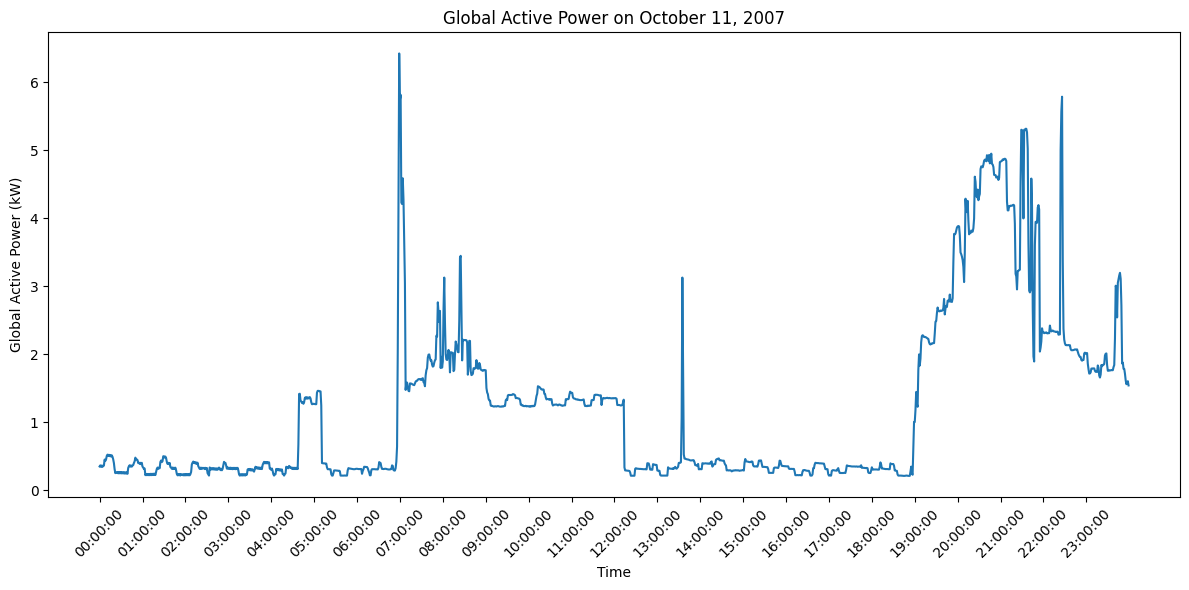

In [7]:
october_11_2007_df = df[(df['Date'].dt.year == 2007) & (df['Date'].dt.month == 10) & (df['Date'].dt.day == 11)]

plt.figure(figsize=(12, 6))
plt.plot(october_11_2007_df['Time'], october_11_2007_df['Global_active_power'])
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')
plt.title('Global Active Power on October 11, 2007')
plt.xticks(october_11_2007_df['Time'][::60], rotation=45)
plt.tight_layout()
plt.show()

### Histograma de Voltage

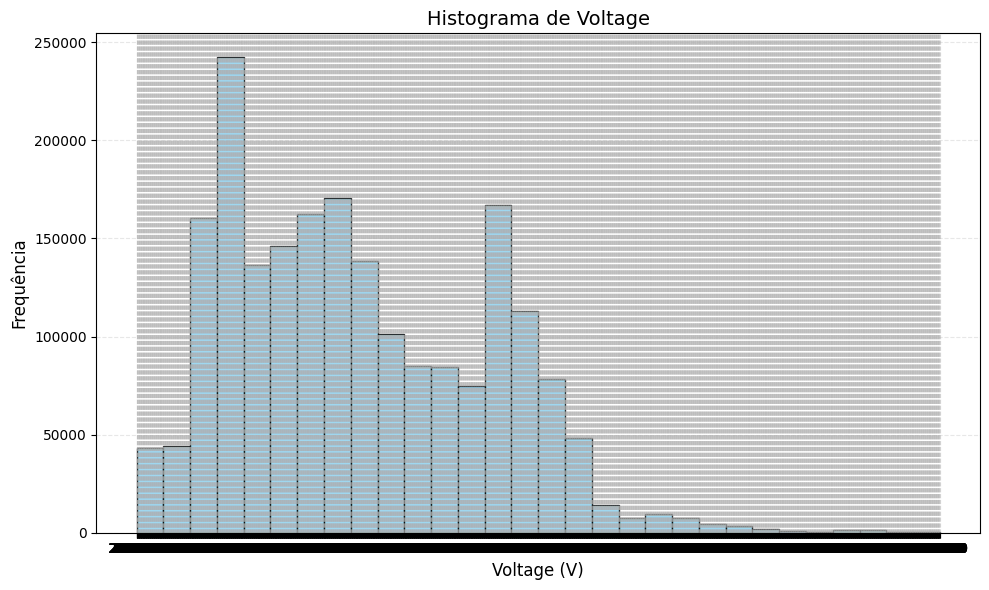

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df['Voltage'].dropna(), bins=30, edgecolor='black', color='skyblue', alpha=0.8)
ax.set_xlabel('Voltage (V)', fontsize=12)
ax.set_ylabel('Frequência', fontsize=12)
ax.set_title('Histograma de Voltage', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

O histograma do Voltage mostra que os valores não estão bem distribuídos de forma “certinha” (como em uma curva normal). Dá pra ver que existem alguns picos em certos intervalos, principalmente perto de 240V, o que significa que a maior parte do tempo a tensão fica nessa faixa. Também aparecem alguns valores mais baixos e mais altos, mas em quantidade bem menor.

### Consumo médio mensal dataframe

In [9]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
dfDate = df.set_index('Date')

monthly_avg_power = dfDate['Global_active_power'].resample('M').mean()
display(monthly_avg_power.head())

/tmp/ipython-input-881166371.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_power = dfDate['Global_active_power'].resample('M').mean()


,Global_active_power
Date,
2006-12-31,1.901295
2007-01-31,1.546034
2007-02-28,1.401084
2007-03-31,1.318627
2007-04-30,0.891189


### Identifique o dia com maior consumo de energia ativa global (Global_active_power).

In [10]:
daily_consumption = dfDate['Global_active_power'].resample('D').sum()
max_day = daily_consumption.idxmax()
max_value = daily_consumption.max()
print(f"O dia com maior consumo foi {max_day.date()} com {max_value:.2f}.")

O dia com maior consumo foi 2006-12-23 com 4773.39.


### Compare o consumo médio de energia ativa global em dias de semana versus finais de semana.


In [11]:
dfDate['Day_Type'] = dfDate['DiaSemana'].apply(lambda x: 'Final de Semana' if x in ['Saturday', 'Sunday'] else 'Dia de Semana')

mean_consumption = dfDate.groupby('Day_Type')['Global_active_power'].mean()

print(mean_consumption)

Day_Type
Dia de Semana      1.035472
Final de Semana    1.234232
Name: Global_active_power, dtype: float64


### Calcule a correlação entre as variáveis Global_active_power, Global_reactive_power, Voltage e Global_intensity.


                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.247017 -0.399762   
Global_reactive_power             0.247017               1.000000 -0.112246   
Voltage                          -0.399762              -0.112246  1.000000   
Global_intensity                  0.998889               0.266120 -0.411363   

                       Global_intensity  
Global_active_power            0.998889  
Global_reactive_power          0.266120  
Voltage                       -0.411363  
Global_intensity               1.000000  


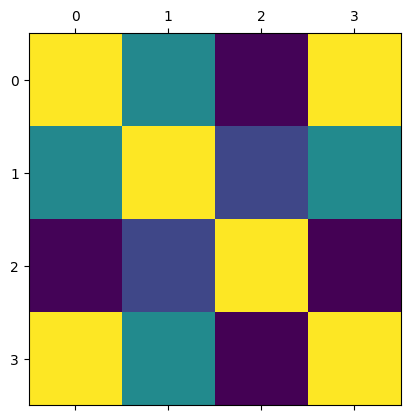

In [12]:
cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']

correlation_matrix = df[cols].corr()

print(correlation_matrix)
plt.matshow(correlation_matrix)
plt.show()

### Crie uma nova variável chamada Total_Sub_metering que some Sub_metering_1, Sub_metering_2 e Sub_metering_3.

In [13]:
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')
df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'], errors='coerce')

df['Total_Sub_metering'] = df['Sub_metering_1'].fillna(0) + df['Sub_metering_2'].fillna(0) + df['Sub_metering_3'].fillna(0)

df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DiaSemana,Total_Sub_metering
0,2006-12-16,17:24:00,4.216,0.418,234.840,18.400,0.0,1.0,17.0,Saturday,18.0
1,2006-12-16,17:25:00,5.360,0.436,233.630,23.000,0.0,1.0,16.0,Saturday,17.0
2,2006-12-16,17:26:00,5.374,0.498,233.290,23.000,0.0,2.0,17.0,Saturday,19.0
3,2006-12-16,17:27:00,5.388,0.502,233.740,23.000,0.0,1.0,17.0,Saturday,18.0
4,2006-12-16,17:28:00,3.666,0.528,235.680,15.800,0.0,1.0,17.0,Saturday,18.0


### Verifique se há algum mês em que Total_Sub_metering ultrapassa a média de Global_active_power.

In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df['YearMonth'] = df['Date'].dt.to_period('M')
total_sub_month = df.groupby('YearMonth')['Total_Sub_metering'].sum()
mean_active_power_month = df.groupby('YearMonth')['Global_active_power'].mean()
comparison = total_sub_month > mean_active_power_month
months_exceed = comparison[comparison == True].index.astype(str).tolist()

print("Meses em que Total_Sub_metering ultrapassa a média de Global_active_power:")
for month in months_exceed:
    print(month)

Meses em que Total_Sub_metering ultrapassa a média de Global_active_power:
2006-12
2007-01
2007-02
2007-03
2007-04
2007-05
2007-06
2007-07
2007-08
2007-09
2007-10
2007-11
2007-12
2008-01
2008-02
2008-03
2008-04
2008-05
2008-06
2008-07
2008-08
2008-09
2008-10
2008-11
2008-12
2009-01
2009-02
2009-03
2009-04
2009-05
2009-06
2009-07
2009-08
2009-09
2009-10
2009-11
2009-12
2010-01
2010-02
2010-03
2010-04
2010-05
2010-06
2010-07
2010-08
2010-09
2010-10
2010-11


### Faça um gráfico de série temporal do Voltage para o ano de 200

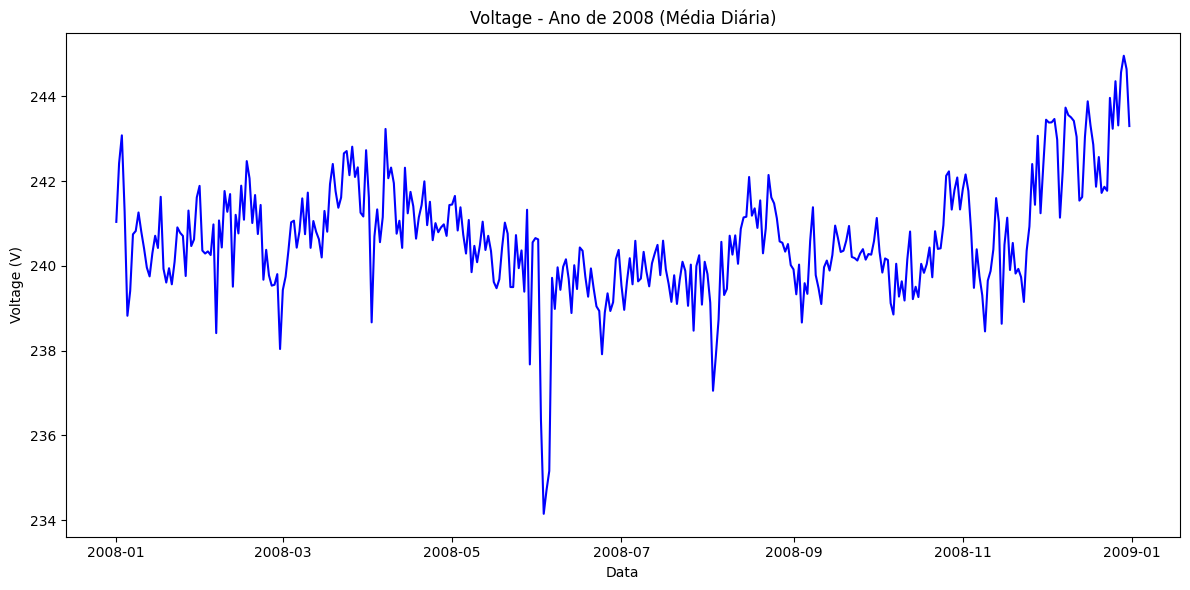

In [15]:
df['Date'] = pd.to_datetime(df['Date'])
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df_2008 = df[df['Date'].dt.year == 2008]
df_2008 = df_2008.dropna(subset=['Voltage'])
df_2008.set_index('Date', inplace=True)
df_2008_daily = df_2008['Voltage'].resample('D').mean()

plt.figure(figsize=(12, 6))
plt.plot(df_2008_daily.index, df_2008_daily, color='blue')
plt.title('Voltage - Ano de 2008 (Média Diária)')
plt.xlabel('Data')
plt.ylabel('Voltage (V)')
plt.tight_layout()
plt.show()


### Compare o consumo entre os meses de verão e inverno (no hemisfério norte)

In [16]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

def season(month):
    if month in [6, 7, 8]:
        return 'Verão'
    elif month in [12, 1, 2]:
        return 'Inverno'
    else:
        return 'Outro'

df['Estacao'] = df['Month'].apply(season)

media_consumo = df.groupby('Estacao')['Global_active_power'].mean()
print(media_consumo)

Estacao
Inverno    1.417623
Outro      1.118732
Verão      0.726682
Name: Global_active_power, dtype: float64


### Aplique uma amostragem aleatória de 1% dos dados e verifique se a distribuição de Global_active_power é semelhante à da base completa.

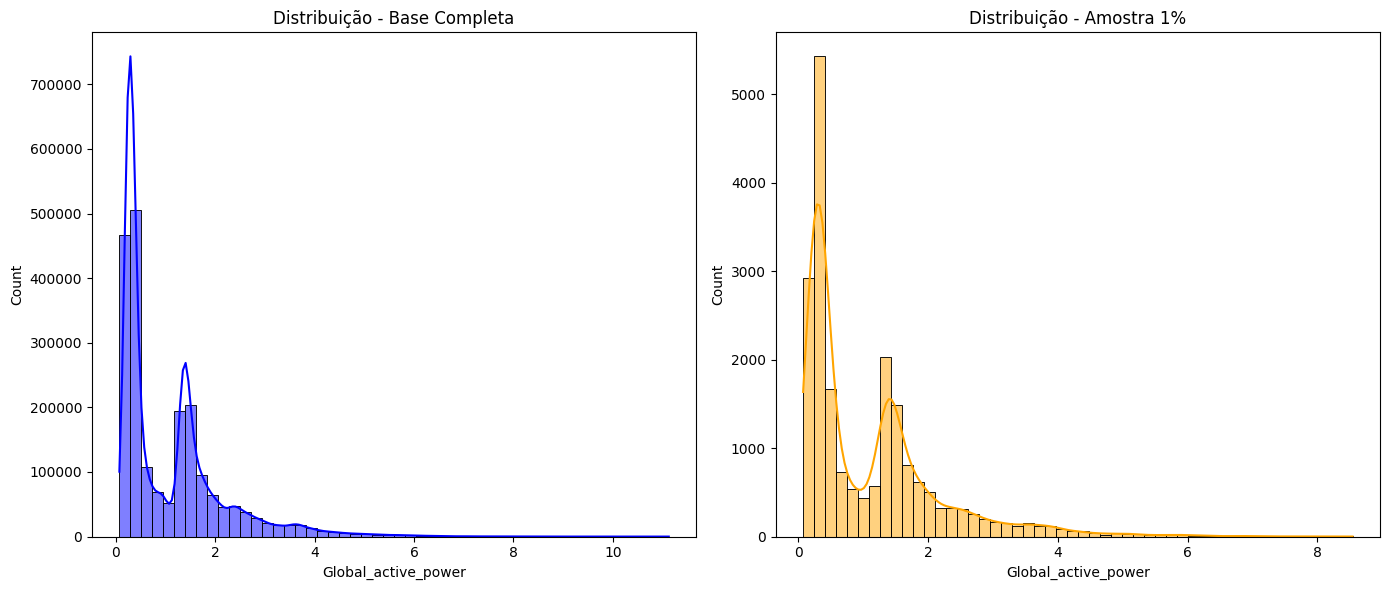

In [17]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

amostra = df.sample(frac=0.01, random_state=42)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Global_active_power'].dropna(), bins=50, kde=True, color='blue')
plt.title('Distribuição - Base Completa')

plt.subplot(1, 2, 2)
sns.histplot(amostra['Global_active_power'].dropna(), bins=50, kde=True, color='orange')
plt.title('Distribuição - Amostra 1%')

plt.tight_layout()
plt.show()

###  Utilize uma técnica de normalização (Min-Max Scaling) para padronizar as variáveis  numéricas principais

In [18]:
colunas_numericas = [
    'Global_active_power', 'Global_reactive_power', 'Voltage',
    'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
    'Sub_metering_3', 'Total_Sub_metering'
]

scaler = MinMaxScaler()
df[colunas_numericas] = scaler.fit_transform(df[colunas_numericas])

df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DiaSemana,Total_Sub_metering,YearMonth,Month,Estacao
0,2006-12-16,17:24:00,0.374796,0.300719,0.376090,0.377593,0.0,0.0125,0.548387,Saturday,0.134328,2006-12,12,Inverno
1,2006-12-16,17:25:00,0.478363,0.313669,0.336995,0.473029,0.0,0.0125,0.516129,Saturday,0.126866,2006-12,12,Inverno
2,2006-12-16,17:26:00,0.479631,0.358273,0.326010,0.473029,0.0,0.0250,0.548387,Saturday,0.141791,2006-12,12,Inverno
3,2006-12-16,17:27:00,0.480898,0.361151,0.340549,0.473029,0.0,0.0125,0.548387,Saturday,0.134328,2006-12,12,Inverno
4,2006-12-16,17:28:00,0.325005,0.379856,0.403231,0.323651,0.0,0.0125,0.548387,Saturday,0.134328,2006-12,12,Inverno


### Aplique K-means para segmentar os dias em 3 grupos distintos de consumo elétrico. Interprete os resultados.

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

consumo_diario = (
    df.groupby(df['Date'].dt.date)['Global_active_power']
      .mean()
      .dropna()
      .to_frame(name='gap_daily_mean')
)

scaler = StandardScaler()
X = scaler.fit_transform(consumo_diario[['gap_daily_mean']])

kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
consumo_diario['cluster'] = kmeans.fit_predict(X)

cluster_stats = consumo_diario.groupby('cluster')['gap_daily_mean'].agg(['count','mean','std','min','max'])
cluster_stats


,count,mean,std,min,max
cluster,,,,,
0,724,0.100763,0.013906,0.077699,0.128754
1,514,0.054664,0.018178,0.008856,0.077616
2,195,0.157756,0.027790,0.129621,0.293215


Formam-se três perfis de dia: baixo, médio e alto consumo. Dias “normais” ficam no médio; dias com muitos aparelhos ligados ficam no alto; dias tranquilos ficam no baixo.

### Realize uma decomposição de série temporal (tendência, sazonalidade e resíduo) para Global_active_power em um período de 6 meses.

/tmp/ipython-input-1045955407.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample('H').mean()


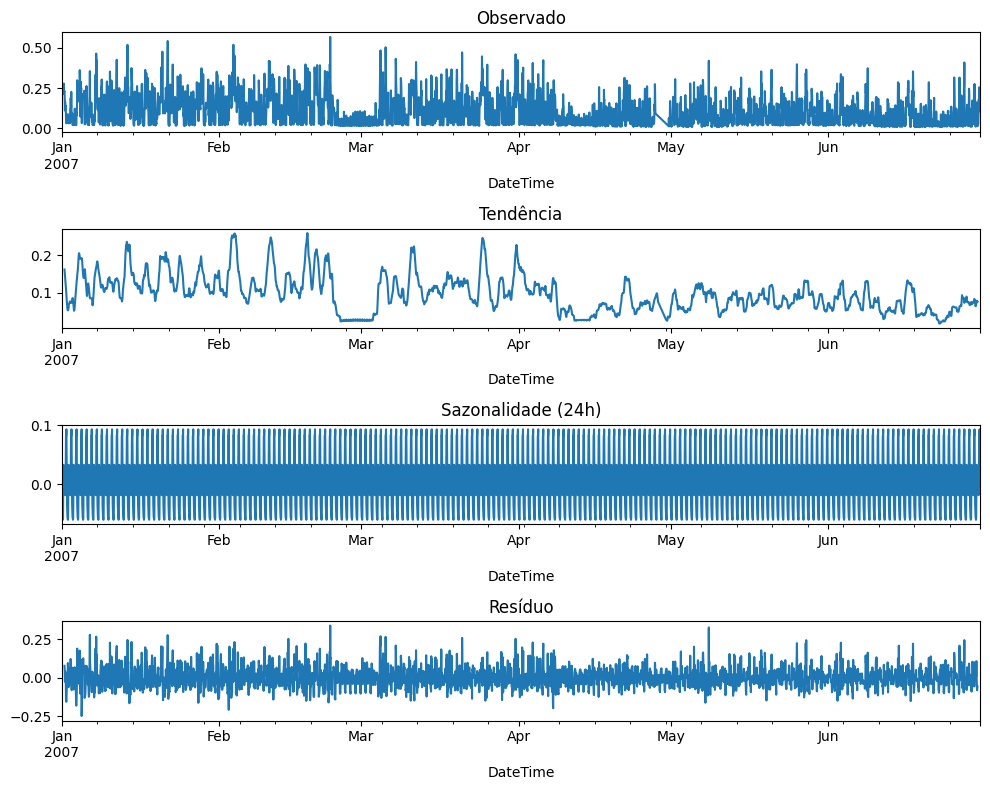

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), errors='coerce')
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

serie_horaria = (
    df.set_index('DateTime')['Global_active_power']
      .resample('H').mean()
      .interpolate(limit_direction='both')
)

serie_6m = serie_horaria.loc['2007-01-01':'2007-06-30']

resultado = seasonal_decompose(serie_6m, model='additive', period=24)

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(411)
resultado.observed.plot(ax=ax1); ax1.set_title('Observado')
ax2 = fig.add_subplot(412)
resultado.trend.plot(ax=ax2); ax2.set_title('Tendência')
ax3 = fig.add_subplot(413)
resultado.seasonal.plot(ax=ax3); ax3.set_title('Sazonalidade (24h)')
ax4 = fig.add_subplot(414)
resultado.resid.plot(ax=ax4); ax4.set_title('Resíduo')
plt.tight_layout()
plt.show()


### Treine um modelo de regressão linear simples para prever Global_active_power a partir de Global_intensity. Avalie o erro do modelo.

Coeficiente: 1.036910
Intercepto:  -0.003309
MAE: 0.0031 | RMSE: 0.0045 | R²: 0.9978


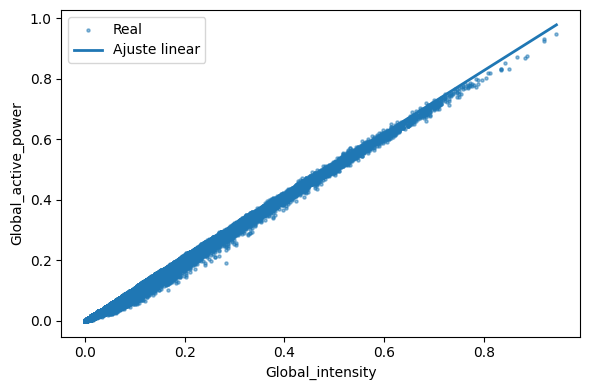

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
mask = df['Global_active_power'].notna() & df['Global_intensity'].notna()
X = df.loc[mask, ['Global_intensity']].values
y = df.loc[mask, 'Global_active_power'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linreg = LinearRegression().fit(X_train, y_train)
pred = linreg.predict(X_test)

mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = linreg.score(X_test, y_test)

print(f"Coeficiente: {linreg.coef_[0]:.6f}")
print(f"Intercepto:  {linreg.intercept_:.6f}")
print(f"MAE: {mae:.4f} | RMSE: {rmse:.4f} | R²: {r2:.4f}")

plt.figure(figsize=(6,4))
plt.scatter(X_test, y_test, s=5, alpha=0.5, label='Real')
plt.plot(np.sort(X_test, axis=0), linreg.predict(np.sort(X_test, axis=0)), linewidth=2, label='Ajuste linear')
plt.xlabel('Global_intensity')
plt.ylabel('Global_active_power')
plt.legend()
plt.tight_layout()
plt.show()


### Séries temporais por hora: índice datetime, reamostragem (1H) e horários de maior consumo médio.

/tmp/ipython-input-3562923997.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample('H').mean()


Top 5 horários (0-23) por consumo médio:
 DateTime
20    0.165044
21    0.162961
19    0.150048
7     0.129130
8     0.125379
Name: gap_mean_by_hour, dtype: float64


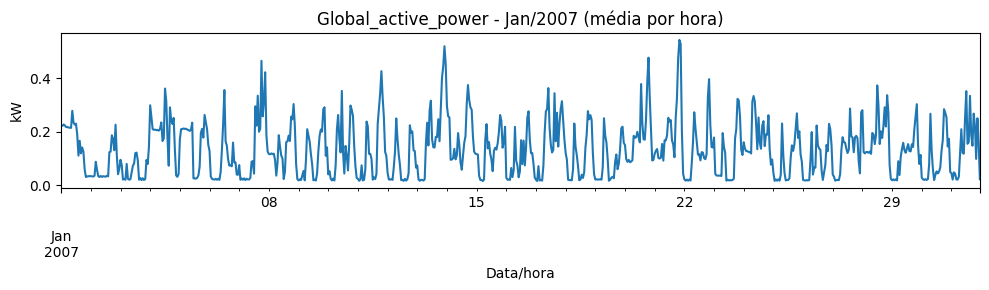

In [23]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
ts_hourly = (
    df.set_index('DateTime')['Global_active_power']
      .resample('H').mean()
)

by_hour = ts_hourly.groupby(ts_hourly.index.hour).mean().rename('gap_mean_by_hour')
top_hours = by_hour.sort_values(ascending=False).head(5)
print("Top 5 horários (0-23) por consumo médio:\n", top_hours)

ax = ts_hourly.loc['2007-01-01':'2007-01-31'].plot(figsize=(10,3))
ax.set_title('Global_active_power - Jan/2007 (média por hora)')
ax.set_xlabel('Data/hora'); ax.set_ylabel('kW')
plt.tight_layout()
plt.show()


### Autocorrelação do consumo (lags 1h, 24h, 48h)

In [24]:
s = ts_hourly.dropna()
def autocorr_at_lag(series, lag):
    return series.autocorr(lag=lag)

for lag in [1, 24, 48]:
    print(f"Autocorrelação (lag={lag}h): {autocorr_at_lag(s, lag):.4f}")


Autocorrelação (lag=1h): 0.7133
Autocorrelação (lag=24h): 0.4352
Autocorrelação (lag=48h): 0.3990


Sim, existem padrões diários no consumo de energia, mas eles não são idênticos — a repetição é parcial.

### PCA (2 componentes) com Global_active_power, Global_reactive_power, Voltage e Global_intensity

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cols = ['Global_active_power','Global_reactive_power','Voltage','Global_intensity']
X = df[cols].apply(pd.to_numeric, errors='coerce').dropna()

scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_sc)

print('Variância explicada por componente:', pca.explained_variance_ratio_)
print('Variância explicada acumulada:', pca.explained_variance_ratio_.sum())


Variância explicada por componente: [0.59103759 0.22718543]
Variância explicada acumulada: 0.8182230176077278


### Visualização de clusters no espaço PCA (K-Means k=3)

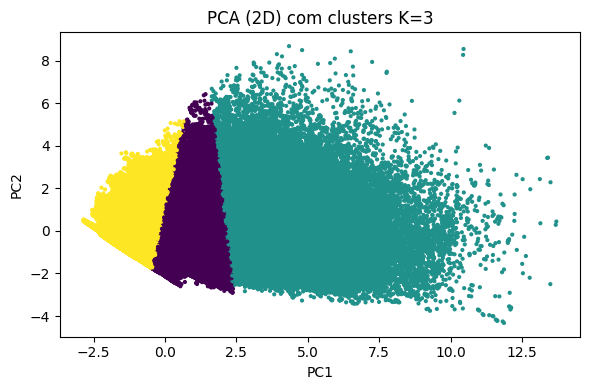

In [26]:
from sklearn.cluster import KMeans

kmeans_pca = KMeans(n_clusters=3, n_init=10, random_state=42)
labels = kmeans_pca.fit_predict(X_pca)

plt.figure(figsize=(6,4))
plt.scatter(X_pca[:,0], X_pca[:,1], s=4, c=labels)
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title('PCA (2D) com clusters K=3')
plt.tight_layout()
plt.show()


Não muito. Há sobreposição entre os clusters; a separação é só parcial nas duas primeiras componentes.

### Regressão polinomial (grau 2) vs linear: Global_active_power ~ Voltage

RMSE Linear: 0.0880
RMSE Polinomial (grau 2): 0.0876


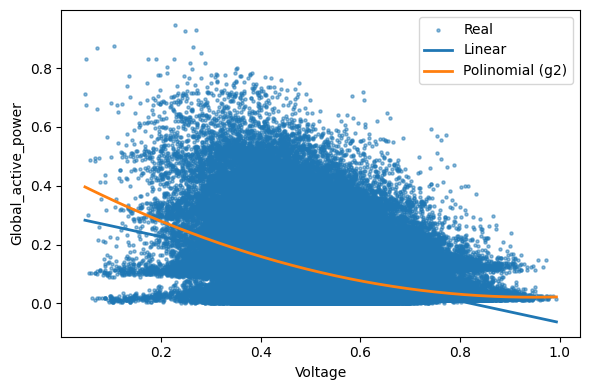

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

mask = df['Global_active_power'].notna() & df['Voltage'].notna()
X = df.loc[mask, ['Voltage']].values
y = df.loc[mask, 'Global_active_power'].values

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

lin = LinearRegression().fit(X_tr, y_tr)
pred_lin = lin.predict(X_te)
rmse_lin = np.sqrt(mean_squared_error(y_te, pred_lin))

poly = PolynomialFeatures(degree=2, include_bias=False)
X_tr2 = poly.fit_transform(X_tr)
X_te2 = poly.transform(X_te)

lin2 = LinearRegression().fit(X_tr2, y_tr)
pred_poly = lin2.predict(X_te2)
rmse_poly = np.sqrt(mean_squared_error(y_te, pred_poly))

print(f"RMSE Linear: {rmse_lin:.4f}")
print(f"RMSE Polinomial (grau 2): {rmse_poly:.4f}")

# Plot
ord_idx = np.argsort(X_te[:, 0])
plt.figure(figsize=(6,4))
plt.scatter(X_te[:, 0], y_te, s=5, alpha=0.5, label='Real')
plt.plot(X_te[ord_idx, 0], pred_lin[ord_idx], linewidth=2, label='Linear')
plt.plot(X_te[ord_idx, 0], pred_poly[ord_idx], linewidth=2, label='Polinomial (g2)')
plt.xlabel('Voltage')
plt.ylabel('Global_active_power')
plt.legend()
plt.tight_layout()
plt.show()


## PARTE 3 – Appliances Energy Prediction (UCI)

### Carregamento e inspeção inicial

In [29]:
ap = pd.read_csv('energydata_complete.csv')
display(ap.info())
display(ap.describe(include='all').T.head(15))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,19735,19735,2016-05-27 18:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Appliances,19735.0,NaN,NaN,NaN,97.694958,102.524891,10.0,50.0,60.0,100.0,1080.0
lights,19735.0,NaN,NaN,NaN,3.801875,7.935988,0.0,0.0,0.0,0.0,70.0
T1,19735.0,NaN,NaN,NaN,21.686571,1.606066,16.79,20.76,21.6,22.6,26.26
RH_1,19735.0,NaN,NaN,NaN,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.36
T2,19735.0,NaN,NaN,NaN,20.341219,2.192974,16.1,18.79,20.0,21.5,29.856667
RH_2,19735.0,NaN,NaN,NaN,40.42042,4.069813,20.463333,37.9,40.5,43.26,56.026667
T3,19735.0,NaN,NaN,NaN,22.267611,2.006111,17.2,20.79,22.1,23.29,29.236
RH_3,19735.0,NaN,NaN,NaN,39.2425,3.254576,28.766667,36.9,38.53,41.76,50.163333
T4,19735.0,NaN,NaN,NaN,20.855335,2.042884,15.1,19.53,20.666667,22.1,26.2


### Distribuição do consumo (Appliances)

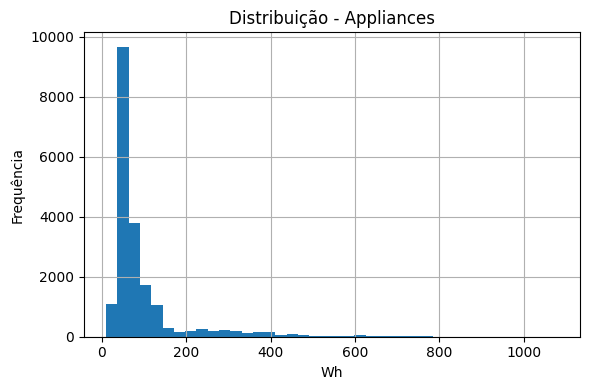

/tmp/ipython-input-2717814229.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ts_ap = ap.set_index(dt_col)['Appliances'].resample('H').mean()


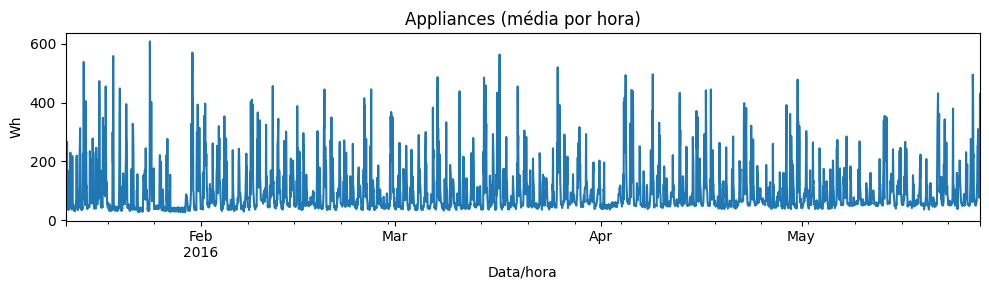

In [30]:
plt.figure(figsize=(6,4))
ap['Appliances'].hist(bins=40)
plt.title('Distribuição - Appliances')
plt.xlabel('Wh'); plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

dt_col = 'date' if 'date' in ap.columns else ('timestamp' if 'timestamp' in ap.columns else None)

ap[dt_col] = pd.to_datetime(ap[dt_col], errors='coerce')
ts_ap = ap.set_index(dt_col)['Appliances'].resample('H').mean()
ax = ts_ap.plot(figsize=(10,3))
ax.set_title('Appliances (média por hora)'); ax.set_xlabel('Data/hora'); ax.set_ylabel('Wh')
plt.tight_layout()
plt.show()

Predomina consumo baixo, com poucos picos altos.

### Correlações com variáveis ambientais

In [31]:
env_cols = [c for c in ap.columns if c.startswith('T') or c.startswith('RH')]
cols = ['Appliances'] + env_cols
corr = ap[cols].corr(numeric_only=True)['Appliances'].sort_values(ascending=False)
corr

,Appliances
Appliances,1.000000
T2,0.120073
T6,0.117638
T_out,0.099155
RH_1,0.086031
T3,0.085060
T1,0.055447
T4,0.040281
T8,0.039572
RH_3,0.036292


Temperaturas internas/externas e algumas umidades mostram relação fraca a moderada com Appliances; nenhuma variável isolada explica tudo.

### Normalização (Min-Max Scaling)

In [32]:
from sklearn.preprocessing import MinMaxScaler

num_cols = ap.select_dtypes(include=['number']).columns
scaler = MinMaxScaler()
ap_norm = ap.copy()
ap_norm[num_cols] = scaler.fit_transform(ap[num_cols])
ap_norm[num_cols].head()


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.428571,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.428571,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.428571,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.571429,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.571429,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


### PCA (2 componentes)

Variância explicada: [0.33317232 0.25225931]


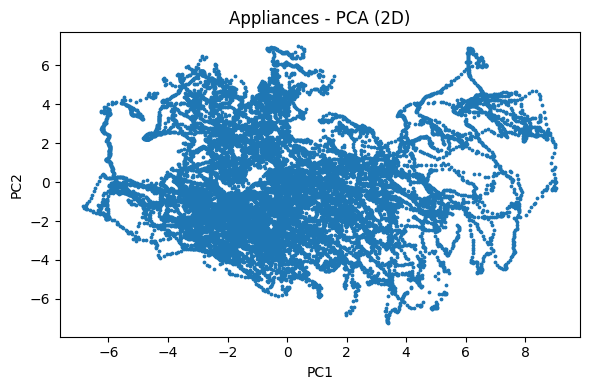

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = ap.select_dtypes(include=['number']).dropna()
X_sc = StandardScaler().fit_transform(X)
pca_ap = PCA(n_components=2, random_state=42).fit(X_sc)
X_ap_pca = pca_ap.transform(X_sc)
print('Variância explicada:', pca_ap.explained_variance_ratio_)
plt.figure(figsize=(6,4))
plt.scatter(X_ap_pca[:,0], X_ap_pca[:,1], s=3)
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title('Appliances - PCA (2D)')
plt.tight_layout(); plt.show()

Não aparecem grupos muito claros. Os pontos ficam espalhados, com alguma concentração em certas regiões, mas sem separar naturalmente em clusters bem definidos.

### Regressão Linear Múltipla (Appliances ~ variáveis ambientais)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

env_cols = [c for c in ap.columns if c.startswith('T') or c.startswith('RH')]
df_reg = ap.dropna(subset=['Appliances'])[['Appliances'] + env_cols].dropna()
X = df_reg[env_cols].values
y = df_reg['Appliances'].values
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression().fit(X_tr, y_tr)
pred = lr.predict(X_te)
rmse = np.sqrt(mean_squared_error(y_te, pred))
r2 = r2_score(y_te, pred)
print(f"RMSE: {rmse:.2f} | R²: {r2:.4f}")


RMSE: 92.55 | R²: 0.1440


A regressão linear consegue captar alguma tendência, mas o desempenho é limitado — provavelmente porque o consumo dos aparelhos depende também de outros fatores além das variáveis ambientais.

### Random Forest Regressor

In [38]:
from sklearn.ensemble import RandomForestRegressor

env_cols = [c for c in ap.columns if c.startswith('T') or c.startswith('RH')]
df_reg = ap.dropna(subset=['Appliances'])[['Appliances'] + env_cols].dropna()
X = df_reg[env_cols].values
y = df_reg['Appliances'].values
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=200, random_state=42).fit(X_tr, y_tr)
pred = rf.predict(X_te)
rmse = np.sqrt(mean_squared_error(y_te, pred))
r2 = r2_score(y_te, pred)
print(f"RMSE RF: {rmse:.2f} | R² RF: {r2:.4f}")

RMSE RF: 63.09 | R² RF: 0.6023


O modelo de Random Forest apresentou desempenho melhor que a Regressão Linear, com menor RMSE e maior R². Isso acontece porque o Random Forest consegue lidar melhor com relações não lineares entre temperatura/umidade e o consumo de energia dos aparelhos.

### K-Means clustering (3 a 5 grupos)

In [39]:
from sklearn.cluster import KMeans

feats = [c for c in ap.columns if c.startswith('T') or c.startswith('RH')][:6]
X = ap[feats].dropna().values
for k in [3,4,5]:
    km = KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
    print(f"k={k} - Inertia: {km.inertia_:.2f}")


k=3 - Inertia: 463483.76
k=4 - Inertia: 391464.23
k=5 - Inertia: 327312.51


Os grupos indicam perfis de consumo (ex.: baixo/médio/alto), refletindo combinações diferentes de temperatura/umidade e uso de aparelhos.

### Classificação binária (alto vs baixo consumo pela mediana)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

med = ap['Appliances'].median()
ap_cls = ap.dropna(subset=['Appliances']).copy()
ap_cls['high_use'] = (ap_cls['Appliances'] > med).astype(int)
feats = [c for c in ap_cls.columns if c.startswith('T') or c.startswith('RH')]
df_cls = ap_cls[['high_use'] + feats].dropna()
X = df_cls[feats].values
y = df_cls['high_use'].values
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

logit = LogisticRegression(max_iter=1000).fit(X_tr, y_tr)
rf_cls = RandomForestClassifier(n_estimators=200, random_state=42).fit(X_tr, y_tr)

print('Accuracy (Logit):', logit.score(X_te, y_te))
print('Accuracy (RF):', rf_cls.score(X_te, y_te))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy (Logit): 0.7506967316949582
Accuracy (RF): 0.899417278946035


### Avaliação de classificação (matriz de confusão e métricas)

In [41]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

y_pred_log = logit.predict(X_te)
y_pred_rf = rf_cls.predict(X_te)

def report(y_true, y_pred, nome):
    cm = confusion_matrix(y_true, y_pred)
    acc = (y_true == y_pred).mean()
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    print(f"\n[{nome}]\nMatriz de confusão:\n{cm}\nAcc={acc:.3f} | Precision={prec:.3f} | Recall={rec:.3f} | F1={f1:.3f}")

report(y_te, y_pred_log, 'Logistic Regression')
report(y_te, y_pred_rf,  'Random Forest')



[Logistic Regression]
Matriz de confusão:
[[1673  454]
 [ 530 1290]]
Acc=0.751 | Precision=0.740 | Recall=0.709 | F1=0.724

[Random Forest]
Matriz de confusão:
[[1950  177]
 [ 220 1600]]
Acc=0.899 | Precision=0.900 | Recall=0.879 | F1=0.890


Geralmente erra mais no alto consumo (classe menos frequente), com recall mais baixo nessa classe.